In [2]:
# The part of the folowing code is modified and refrecned from the Mikael Haji's MotorImganiry code work (https://github.com/mikaelhaji/MotorImagery)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from wyrm import processing as proc
from wyrm.types import Data
from wyrm import processing as proc
from wyrm.types import Data
import matplotlib.pyplot as plt
from wyrm import plot as pt
import logging

print("complete")

complete


In [142]:
# Load the Preprocessed Data
df = pd.read_csv('data.csv')
df_eeg_data = df[['1','2','3','4','5','6','7', '8']]

# Split the data into train and test set
train, test = train_test_split(df_eeg_data, test_size=0.2, random_state=42, shuffle=False)

In [143]:
# Convert Test and Training Data into Numpy Array
train = train.to_numpy()
test = test.to_numpy()

# Length of Windows (s)
window_length = 10
epoched_corrected = []

for filtered in train.T:
    array_epochs = []
    i = 0
    window_size_hz = int(window_length*250) # 10 Seconds

    while(i  < len(train) ):
        array_epochs.append(train[i:i + window_size_hz])
        i = i + window_size_hz 
    
    epoch = array_epochs
    data = np.array(array_epochs) # epoched_train

print(data.shape)


# Epoching Test Data
epoched_corrected = []

for filtered in test.T:
    array_epochs = []
    i = 0
    window_size_hz = int(window_length*250) # 10 Seconds

    while(i  < len(test) ):
        array_epochs.append(test[i:i + window_size_hz])
        i = i + window_size_hz 
    
    epoch = array_epochs
    epoched_test = np.array(array_epochs) # epoched_test

print(epoched_test.shape)

(48, 2500, 8)
(12, 2500, 8)


In [144]:
# Label Test
df_test = pd.read_csv('Label_Test.csv')
df_test = ((df_test).to_numpy()).flatten()
print(df_test.shape)

# Label Train
df_train = pd.read_csv('Label_Train.csv')
df_train = ((df_train).to_numpy()).flatten()
print(df_train.shape)

(12,)
(48,)


In [145]:
# Convert the train data into wyrm Data Format
axes = [np.arange(i) for i in data.shape]

# Assign 48 Labels to axes[0]
axes[0] = df_train
axes[2] = [str(i) for i in range(data.shape[2])]

# Initialize the 2nd and 3rd attribute
names = ['Class', 'Time', 'Channel']
units = ['#', 'ms', '#']


dat_train = Data(data=data, axes=axes, names=names, units=units)
dat_train.fs = 250

# Classes (2)
dat_train.class_names = ['right', 'left']


# Converting 0s and 1s for binary classification
dat_train.axes[0][dat_train.axes[0] == 2] = 0

print(dat_train)

Data: 
[[[-7.5154e+02  4.8597e+02  1.5596e+01 ... -5.2840e+02  8.1283e+01
    6.4473e+02]
  [-4.7242e+03  3.0683e+03  1.1578e+02 ... -3.2506e+03  5.1949e+02
    3.9849e+03]
  [-1.2832e+04  8.3726e+03  3.6434e+02 ... -8.5474e+03  1.4316e+03
    1.0540e+04]
  ...
  [-1.7003e+01  3.8382e+00  1.4674e+01 ...  1.4351e+00 -4.3828e+01
   -2.4517e+01]
  [-1.9343e+01  5.0276e+00  1.3461e+01 ...  9.1418e+00 -3.8666e+01
   -2.9434e+01]
  [-1.1171e+01  3.8858e+00  1.0314e+01 ...  1.0234e+01 -3.1866e+01
   -2.9345e+01]]

 [[ 5.9843e+00  5.6534e-01  7.2644e+00 ... -1.0615e+00 -2.6838e+01
   -1.7199e+01]
  [ 1.4462e+01  1.4464e+00  7.0679e+00 ... -1.4370e+01 -2.7029e+01
   -5.9815e+00]
  [ 7.3493e+00  5.6371e+00  8.2739e+00 ... -1.7730e+01 -3.1132e+01
   -5.5254e+00]
  ...
  [ 7.9508e+00  7.0110e+00  2.1605e+01 ... -1.8832e+01 -2.7690e+01
   -6.7029e+00]
  [ 3.7299e+00  8.2001e+00  1.8784e+01 ... -1.2450e+01 -1.9870e+01
   -1.0449e+01]
  [ 1.4329e+00  9.1572e+00  1.8334e+01 ... -9.0052e+00 -1.4079e+01

In [146]:
# Get the data and running
data = epoched_test
print(data.shape)

(12, 2500, 8)


In [147]:
# Convert the test data into wyrm data format
axes = [np.arange(i) for i in data.shape]
axes[2] = [str(i) for i in range(data.shape[2])]


# Assign 12 Labels to axes[0]
axes[0] = df_test
names = ['Class', 'Time', 'Channel']
units = ['#', 'ms', '#']
dat_test = Data(data=data, axes = axes, names = names, units = units)
dat_test.fs = 250

# Classes (2)
dat_test.class_names = ['right' , 'left']

# Converting 0s and 1s for binary classification
dat_test.axes[0][dat_test.axes[0] == 2] = 0

print(dat_test)

Data: 
[[[-1.3765e+01  5.2133e+00 -1.5364e+00 ... -4.3906e+01  1.0937e+01
    3.3022e+01]
  [-2.0846e+01  1.1145e+01 -1.8373e+00 ... -4.8685e+01  1.9389e+00
    2.6835e+01]
  [-3.1414e+01  1.4450e+01 -4.8598e+00 ... -4.3430e+01  1.4752e+00
    1.6685e+01]
  ...
  [-3.4478e+00  5.2173e+00  2.2217e+01 ...  1.8428e+01 -2.7931e+01
   -1.0074e+01]
  [-3.3959e+00  6.1709e+00  2.0456e+01 ...  1.3597e+01 -2.2995e+01
   -7.4894e+00]
  [-3.9508e+00  7.3757e+00  2.0901e+01 ...  1.1124e+01 -2.0300e+01
   -1.3476e+01]]

 [[-2.0581e+00  6.7322e+00  2.2602e+01 ...  9.3935e+00 -2.4109e+01
   -2.1143e+01]
  [ 2.0838e+00  6.7605e+00  2.2717e+01 ...  1.9215e+00 -2.7824e+01
   -1.9829e+01]
  [ 2.3362e+00  9.0910e+00  1.8663e+01 ... -8.1048e+00 -2.2213e+01
   -1.1961e+01]
  ...
  [-6.4882e+00  1.1475e+01 -3.0012e+00 ... -1.8506e+01  9.1934e+00
    7.3090e-01]
  [-1.0379e+01  1.3662e+01 -2.3719e+00 ... -1.4313e+01  1.0541e+01
    1.6915e+00]
  [-9.9713e+00  1.2927e+01 -1.3098e+00 ... -9.8154e+00  4.3719e+00

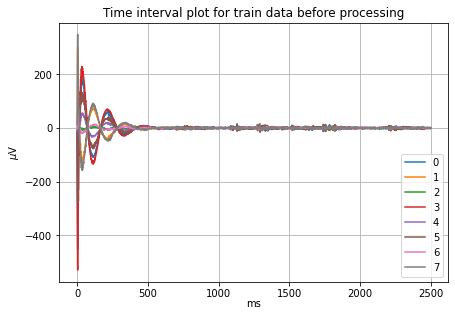

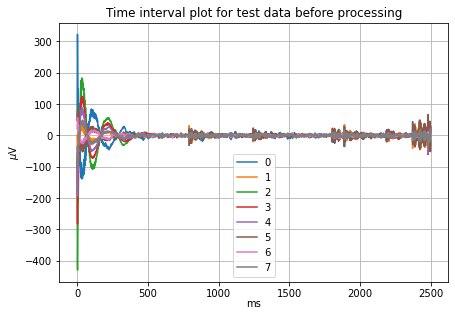

In [148]:
import matplotlib.pyplot as plt
from wyrm import plot as pt
pt.plot_timeinterval(dat_train)
plt.title("Time interval plot for train data before processing")
plt.savefig('Train_before_Process.png', dpi=900, format= "png", bbox_inches="tight")
pt.plot_timeinterval(dat_test)
plt.title("Time interval plot for test data before processing")  
plt.savefig('Test_before_Process.png', dpi=900, format= "png", bbox_inches="tight")

DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so ti

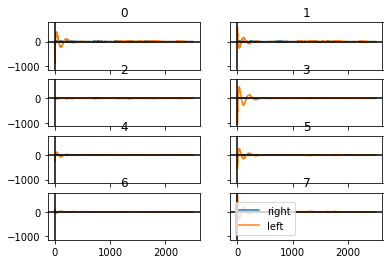

DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of Axes not in the figure, so ti

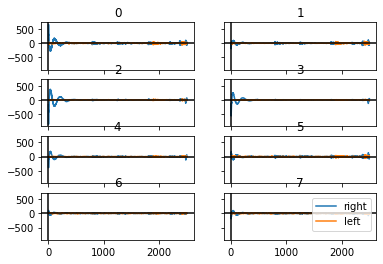

In [149]:
# Class Average for each channel
pt.plot_channels(dat_train,2)
#plt.savefig('/content/train_Class_average.png', dpi=600, format= "png", bbox_inches="tight")
pt.plot_channels(dat_test,2)
#plt.savefig('/content/Test_class_average.png', dpi=600, format= "png", bbox_inches="tight")

In [150]:
def prepoc(dat_train, dat_test):
  fsm=dat_train.fs/2
  # filtering the data with 0.9 Hz high and 15 Hz low filter to reduce noise, applying butterworth filters accompanied low pass and high pass filter
  c,a=proc.signal.butter(8,[15/fsm],btype='low')
  dat_train=proc.lfilter(dat_train,c,a)
  c,a=proc.signal.butter(8,0.9/fsm,btype='high')
  dat_train=proc.lfilter(dat_train,c,a)
  c,a=proc.signal.butter(8,[15/fsm],btype='low')
  dat_test=proc.lfilter(dat_test,c,a)
  c,a=proc.signal.butter(8,0.9/fsm,btype='high')
  dat_test=proc.lfilter(dat_test,c,a)
  

  pt.plot_timeinterval(dat_train)
  plt.title("Time interval plot for train data after filtering and subsampling")

  pt.plot_timeinterval(dat_test)
  plt.title("Time interval plot for test data after filtering and subsampling")
  
  #applying common spatial pattern
  filt, pattern, _ = proc.calculate_csp(dat_train)
  dat_train = proc.apply_csp(dat_train, filt)
  dat_test = proc.apply_csp(dat_test, filt)
  dat_train = proc.variance(dat_train,1)
  dat_train = proc.logarithm(dat_train)
  
  dat_test = proc.variance(dat_test,1)
  dat_test = proc.logarithm(dat_test)
  dat_train = proc.rectify_channels(dat_train)
  dat_test = proc.rectify_channels(dat_test)
  
  dat_train = proc.square(dat_train)
  dat_test = proc.square(dat_test)
  
  pt.plot_timeinterval(dat_train)
  plt.title("Time interval plot for train data after CSP filter")
  pt.plot_timeinterval(dat_test)
  plt.title("Time interval plot for test data after CSP filter")

  return dat_train,dat_test



In [151]:
log = logging.getLogger('UNIQUE_NAME_HERE')
log.setLevel(logging.DEBUG)

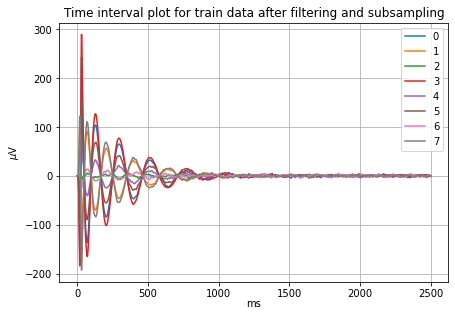

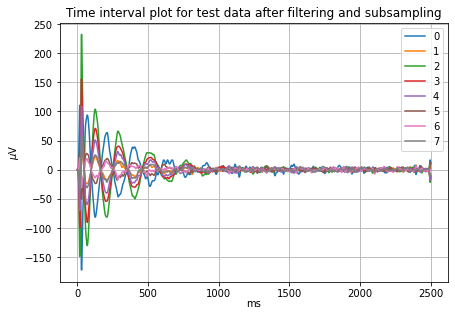

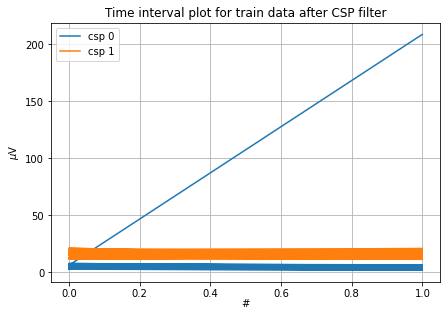

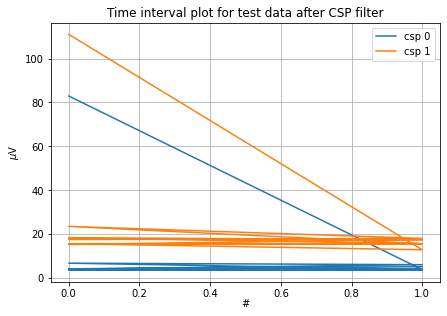

In [152]:
fvtr, fvte = prepoc(dat_train, dat_test)

Text(0.5, 1.0, 'Time interval plot for train data after CSP filter')

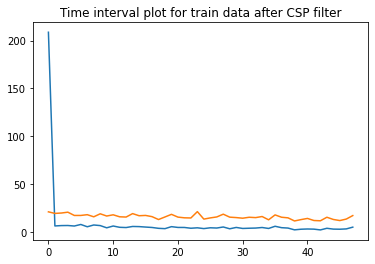

In [153]:
plt.plot(fvtr.data) #CSP for label 0 and 1 in train data
#plt.show
plt.title("Time interval plot for train data after CSP filter")

In [154]:
from wyrm import processing as proc

cfy = proc.lda_train(fvtr)
result=proc.lda_apply(fvte,cfy)
result1=(np.sign(result)+1)/2

# predict the result from train 
y_tr=df_train
y_tr[y_tr == 2] = 0
print(y_tr)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0]


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score, precision_score, recall_score
rf = RandomForestClassifier(max_depth = 5, n_estimators=50,n_jobs=1)
rf.fit(fvtr.data, y_tr)
rf_predict= rf.predict(fvte.data)
print(rf_predict)

[0 0 1 1 0 0 1 1 1 1 0 0]


In [56]:
import pyautogui
for i in range(12):
    if rf_predict[i]==0:
        pyautogui.moveRel(50, 0, duration = 0.5)
        pyautogui.click()
    else:
        pyautogui.moveRel(-50, 0, duration = 0.5)
        pyautogui.click()

Text(0.5, 0, 'Performance Accuracy in Percentage')

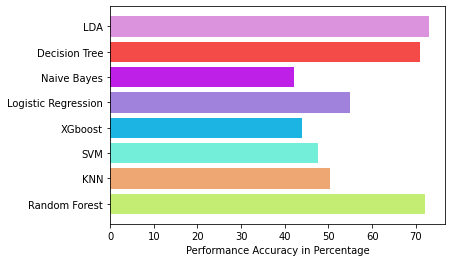

In [160]:
rf_acc=0.72
k_acc=0.504
svm_acc=0.475
xg_acc=0.44
lr_acc=0.55
nb_acc=0.42
dt_acc=0.71
lda_acc=0.73

X_bar = ['Random Forest','KNN','SVM','XGboost','Logistic Regression','Naive Bayes','Decision Tree','LDA']
Y_bar= [rf_acc*100,k_acc*100,svm_acc*100,xg_acc*100,lr_acc*100,nb_acc*100,dt_acc*100,lda_acc*100]
import matplotlib.pyplot as plt
plt.barh(X_bar, Y_bar, align='center', color=('#C4EE73','#EEA773', '#73EED9', '#1CB4E3', '#A081DC', '#BE20E7', '#F54B48','#DC93DD'))
plt.xlabel("Performance Accuracy in Percentage")

